# Case 1 SOK-1006

Oppgaven er gjort i samarbeid med kandidatnummer 6, 12, 25

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import numpy as np
from sympy.solvers import solve

In [2]:
# Definere demand kurven
def demand(c,Q,y,pb):
    demand = (c.log(Q) - (-4.507 + 0.841 * y + 0.2775*pb)) / (-0.397)
    return demand

In [3]:
# Definerer supply long run kurven
def supply(c,Q,N,X,pf,t):
    supply  = ((1 - 0.631)*c.log(N*Q+X) - (2.030 - 0.146*pf + 0.0184*t))/(0.221)
    return supply

In [4]:
# Definerer supply long short kurven
def supply_curve_short_run(c,Q,N,X,pf,t,Q_fitted):
    supply_curve_short_run  = (((c.log(N*Q+X)-(2.030-0.146*pf+0.0184*t+0.631*c.log(N*Q_fitted+X)))) / 0.221)
    return supply_curve_short_run

In [5]:
# Finner likevekt 
def equate_q(y,pb,N,X,pf,t):
    Q = sp.symbols('Q')
    Eq = sp.Eq(demand(sp,Q,y,pb),supply(sp,Q,N,X,pf,t))
    sol = sp.nsolve(Eq, 40)
    return float(sol)

In [6]:
def plot_year(df,year):

    Q = sp.symbols('y, pb, N, X, pf, t')

    #obtaining the relevant variables for year:
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
    cpi=d['CPI']
    y=np.log(d['Y'])
    pb=np.log(d['PBEEF']/cpi)
    N=d['POP']
    X=d['QPRODA']/1439-d['Q']*d['POP']
    pf=np.log(d['PF']/cpi)
    t=d['TIME']
    
    #obtaining equilibrium quantity:
    Q_fitted=equate_q(y,pb,N,X,pf,t) 
    # Plotter funksjonen
    Q = np.linspace(0.1, 100, 100)
    plt.plot(Q,np.exp(demand(np,Q,y,pb))*cpi,  color = 'green', label = 'Etterpørsel kurve')
    plt.plot(Q,np.exp(supply(np,Q,N,X,pf,t))*cpi,  color = 'red', label = 'Langsiktig tilbud')
    plt.plot(Q,np.exp(supply_curve_short_run(np,Q,N,X,pf,t,Q_fitted))*cpi,  color = 'blue', label = 'Kortsiktig tilbud')
    plt.xlabel('Enheter')
    plt.ylabel('Pris')
    plt.ylim(0, 400)
    plt.legend(loc = 'best', frameon = False)
    plt.title("Tilbud og Etterspørsel på kort og lang sikt ")

    plt.show()

## Figur 1

Etter 1950-tallet skjedde det en stor økning i inntekt, i tillegg sank produksjonskostnadene og produktiviteten økte. Dette førte til en endring i tilbud og etterspørsel. Siden inntektene økte førte dette til at etterspørselen også økte, mens produksjonskostnadene gikk opp førte dette til økt tilbud. Dette kumulerte til en lavere likevektspris, men en høyere likevekts mengde.

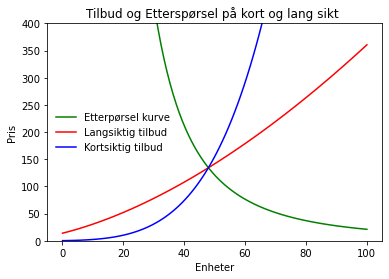

In [7]:
df=pd.read_csv("https://uit-sok-1006-v22.github.io/innleveringer/chickendata.csv",delimiter=";")
plot_year(df,1995)

## Figur 2

/tmp/ipykernel_4726/2739796383.py:3: RuntimeWarning: invalid value encountered in log
  supply  = ((1 - 0.631)*c.log(N*Q+X) - (2.030 - 0.146*pf + 0.0184*t))/(0.221)
/tmp/ipykernel_4726/2971889009.py:3: RuntimeWarning: invalid value encountered in log
  supply_curve_short_run  = (((c.log(N*Q+X)-(2.030-0.146*pf+0.0184*t+0.631*c.log(N*Q_fitted+X)))) / 0.221)


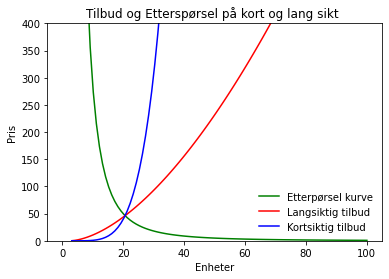

In [8]:
plot_year(df,1960)

In [9]:
def plot_year1(df,year):

    Q = sp.symbols('y, pb, N, X, pf, t')

    #obtaining the relevant variables for year:
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
    cpi=d['CPI']
    y=np.log(d['Y'])
    pb=np.log(d['PBEEF']/cpi)
    N=d['POP']
    X=d['QPRODA']/1439-d['Q']*d['POP']
    pf=np.log(d['PF']/cpi)
    t=d['TIME']

    #obtaining equilibrium quantity:
    Q_fitted=equate_q(y,pb,N,X,pf,t) 
    
    # Plotter funksjonen
    Q = np.linspace(0.1, 80, 100)+0.5
    plt.plot(Q,np.exp(demand(np,Q,y,pb))*cpi,  color = 'green', label = 'Etterpørsel kurve')
    plt.plot(Q,np.exp(demand(np,Q+0.5,y,pb))*cpi, color = 'black', label = 'Etterpørsel kurve 2')
    plt.plot(Q,np.exp(demand(np,Q,y+0.5,pb))*cpi, color = 'pink', label = 'Etterpørsel kurve 3')
    plt.plot(Q,np.exp(demand(np,Q,y,pb+0.5))*cpi, color = 'purple', label = 'Etterpørsel kurve 4') 
    plt.plot(Q,np.exp(supply(np,Q,N,X,pf,t))*cpi,  color = 'red', label = 'Langsiktig tilbud')
    plt.plot(Q,np.exp(supply_curve_short_run(np,Q,N,X,pf,t,Q_fitted))*cpi,  color = 'blue', label = 'Kortsiktig tilbud')
    plt.xlabel('Enheter')
    plt.ylabel('Pris')
    plt.ylim(0, 400)
    plt.legend(loc = 'best', frameon = False)  
    plt.title("Tilbud og Etterspørsel på kort og lang sikt")
    
    plt.show()

## Figur 3

En økning med 0.5 i kvantum vil ha så si endring på likevektspris -og kvantum. 

Om man øker med 0.5 på storfekjøtt fører dette til en større endring på enheter på det langsiktige tilbudet, men en større økning i pris på det kortsiktige tilbudet. Scenario hvor man kan se en økning på storfekjøttpris er for eksempel ved en pandemi hvor forsyningskjeden blir brutt opp og fører til forsinkelser. 

Ved en økning på 0.5 på inntekt ser man den største endringen. I figuren vår ser man at om inntekt øker vil etterspørselen følge etter. Den kortsiktige prisen vil være høyere enn prisen på lang sikt, mens kvantum vil være høyere på lang sikt enn på kort sikt. Et scenario der inntekten øker kan være ekspansiv finanspolitikk hvor det kommer skattelette. 


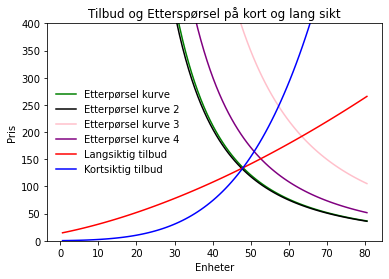

In [10]:
plot_year1(df,1995)